# 1. (Total points: 30)
Consider the grid-world domain shown below. The possible actions are the four
cardinal direction movements: up, down, left and right. All state transitions are deterministic.
Moving in some direction changes the agent’s position by one square in the given direction, unless it
bumps into a wall or hits the edge of the world, in which case the position stays unchanged. Falling
in the hole or reaching the goal both leads to terminal states. The agent gets a reward of +10 points
for reaching the goal state, -1 for bumping into a wall or the edge of the world, and -50 for falling
into a hole. Future rewards are discounted at a rate of 0.9 per step.

## (a) (5 points) 
What is the value of state a under the optimal policy?
***

We use the formula: 

$
V(s) = R(s) + \gamma \times V(s')
$

In [1]:
reward_goal = 10
reward_non_terminal = 0
discount_factor = 0.9

value_goal = reward_goal  
value_f = reward_non_terminal + discount_factor * value_goal
value_e = reward_non_terminal + discount_factor * value_f 
value_d = reward_non_terminal + discount_factor * value_e 
value_c = reward_non_terminal + discount_factor * value_d 
value_b = reward_non_terminal + discount_factor * value_c 
value_a = reward_non_terminal + discount_factor * value_b  

print(f"Value of state a under the optimal policy is: {value_a}")

Value of state a under the optimal policy is: 5.3144100000000005


## (b) (5 points) 
Q-Learning is an Off-Policy TD control method while Sarsa is said to be On-Policy. What does that mean?
***

Firstly, one is an **Off-policy** method while the other is an **On-policy** method.

**Off-policy** methods try to fit a target policy from data that is generated from another, behaviour policy

**On-policy** methods update the existing policy, so the policy used for learning is the same one that is used for behaviour. Meaning the agent will learn from the policy it is actually following.

**SARSA** is more cautious while **Q-learning** aims for the higher reward, even when it is risky. As we saw in the cliff walking example, SARSA chose the safe path while Q-learning aimed for the more risky path.

$$ SARSA $$ 
$$ 
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma Q(s', a') - Q(s, a) \right] 
$$\
SARSA uses the action a' taken in s' for the Q-value update, making it take the penalty from falling in the hole more into account.

$$ Q-Learning $$
$$ Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right] $$
Here we can see that the Q-value update is done using the maximum estimated future reward, even when the agent didnt take the action. This makes the algorithm optimistic as it assumes the future behaviour is greedy and risky.

They major differences in the methods therefore lie in how they update their estimates and exploration vs exploitation where **SARSA** is more balanced while **Q-Learning** is inclined towards exploiting for higher rewards.

## (c) (10 points) 
Suppose Sarsa and Q-Learning would be used to learn a policy for the problem
(without fixing the episodes, but picking them using an epsilon-greedy policy). Which policies
(preferred paths) would you expect the two algorithms to learn? Justify your answer.
***

It is likely that Q-learning will learn the optimal path (a-b-c-d-e-f), even though it is riskier, while SARSA will go around to avoid the hole, as it is much safer (a-g-h-i-j-k-l-m-n-f).

Like we explain in the answer above, SARSA will recognise and take into account that following the optimal path will also make falling into the hole increasinly likely.

## (d) (10 points) 
Does the value for ϵ matter for the answer of the previous question? How? (That
is, which of the methods is affected in which way by changing ϵ?)
***

**SARSA**
High ϵ, or more exploration means that it is more likely that we explore risky acitons and end up in the hole, since SARSA is an on-policy method, it will learn to avoid the hole in the end though. If we lower the ϵ too much the agent will behave safely but might learn not so good paths, therefore never discovering the optimal path.

**Q-Learning**
High ϵ, now the agent will explore more, taking inccreased risks, but as an off-policy method it should find the optimal policy eventually, it could take a lot of time to converge though. If we lower ϵ too much, we end up in a similar case as with SARSA, the agent might stick to suboptimal paths, never learning the best paths.

One option would be to  gradually reducing ε in which case both methods will asymptotically converge to the optimal policy

So the value of ϵ will affect both algorithms. 

# 2. Deadly Triad (Total points: 20)


## (a) (5 points) 
Shortly explain what is meant by ”deadly triad” when discussing reinforcement learning algorithms. (What is the problem and what causes it?)
***

The deadly triad is when all three of **Function Approximation**, **Bootsrapping** and **Off-Policy Training** are mixed together, making algorithms unstable and potentially diverge. But this is not the case when the methods are carefully balanced, using only 1 or 2 elements together, the dangers of the deadly triad can be avoided. So the problem is when we mix them all together, they become unstable and can diverge.

**Function Approximation** is probably the most important element, since without it it's impossible to scale to large problems, but as in the name, are approximations.. leading to potential errors that will get propogated into our future estimates

**Bootstrapping** comes in handy as its useful for data- and computational efficiency, but similar to the function approximation, we are using estimates to estimate future values, so if the estimates are off, they will spiral. Bootstrapping can also introduce higher variance into our value function updates.

**Off-Policy Training** can be optional but can also be essential for advanced use cases if we are learning policies in parallel but often on-policy methods can be adequate and for instance in model-free RL we could choose SARSA instead of Q-learning.

## (b) (15 points) 
Baird’s counterexample is used to illustrate a potential instability of reinforcement
learning algorithms. Show that dropping any of the three parts of the deadly triad (function
approximation, temporal difference learning/bootstrapping, off-policy learning) would result in
convergence to the correct values for Baird’s counterexample.
***

If we remove **Function Approximation** then we go to a tabular setting with a finite number of states and actions. In this case each state action pair will have its own unique value.

Removing **Bootstrapping** we are no longar working with estimates, which removes noise caused by potential inaccurasies, and therefore get a guarantee to converge from the law of large numbers.

Dropping **Off-Policy Learning** we wont have a distribution mismatch since we wont have two policies, and the same policy is generating and updating the estimates. This will result in more stable learning and we will converge. 

# 3. (Total points: 100)
Consider the Lunar Lander environment from https://gymnasium.farama.org/.\
The goal is to land a spacecraft on the moon safely (without crashing) and with as little manouvering
as possible. The state space is 8-dimensional and consists of 
- horizontal and vertical position of the lander (x and y)
- velocities in x and y direction
- the angle of the lander and angular velocity
- for both legs whether they touch the ground or not 


Your task is to use Reinforcement Learning to find a good policy for this setting.


## (a) (10 points) 
Implement a purely random agent for the enviroment as a baseline to compare other
agents to.

In [16]:
import gymnasium as gym

env = gym.make("LunarLander-v2")

num_episodes = 100

episode_rewards = []

for episode in range(num_episodes):
 
    observation, info = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        # random action
        action = env.action_space.sample()
        
        observation, reward, terminated, truncated, info = env.step(action)
        
        # update rewards
        total_reward += reward
        
        done = terminated or truncated

    episode_rewards.append(total_reward)

env.close()

random_avg_reward = sum(episode_rewards) / num_episodes
print(f"Average Reward: {random_avg_reward}")

Average Reward: -196.26850397557067


## (b) (10 points) 
In order to use a tabular approach for solving the problem, you need to first discretize the state space. One way to achieve that is to split each attribute (except for the boolean
ones) evenly into n intervals each, resulting in at most 4 ∗ n
6 different states to consider (not
all of those might be reachable). Implement a function that maps each state/observation to its
discretized version. Keep n as a parameter to tune later and set n = 10 as a default.

In [17]:

def discretize_state(state, n=10):
    number_of_buckets = (n, n, n, n, n, n, 2, 2)  # buckets in each dimension
    state_value_bounds = list(zip(env.observation_space.low, env.observation_space.high))

    state_value_bounds[0] = [-1, 1]  # Position x
    state_value_bounds[1] = [-1, 1]  # Position y
    state_value_bounds[2] = [-1, 1]  # vel x
    state_value_bounds[3] = [-1, 1]  # vel y
    state_value_bounds[4] = [-1, 1]  # angle
    state_value_bounds[5] = [-1, 1]  # angular vel
    state_value_bounds[6] = [0, 1]   # leg1
    state_value_bounds[7] = [0, 1]   # leg2

    bucket_indexes = []
    for i in range(len(state)):
        if state[i] <= state_value_bounds[i][0]:
            bucket_index = 0
        elif state[i] >= state_value_bounds[i][1]:
            bucket_index = number_of_buckets[i] - 1
        else:
            bound_width = state_value_bounds[i][1] - state_value_bounds[i][0]
            offset = (number_of_buckets[i] - 1) * state_value_bounds[i][0] / bound_width
            scaling = (number_of_buckets[i] - 1) / bound_width
            bucket_index = int(round(scaling * state[i] - offset))
        bucket_indexes.append(bucket_index)
    return tuple(bucket_indexes)

# Test the updated function
# Reset the environment to get an initial state
initial_state, _ = env.reset()

# Discretize the initial state using the new function
discrete_initial_state = discretize_state(initial_state)

print(f"Initial state: {initial_state}")
print(f"Discrete initial state: {discrete_initial_state}")


Initial state: [-0.00343218  1.4167135  -0.34765664  0.25747398  0.00398382  0.0787494
  0.          0.        ]
Discrete initial state: (4, 9, 3, 6, 5, 5, 0, 0)


## (c) (15 points) 
Implement on-policy Monte Carlo control to learn a policy for the task. Use a
tabular approach for storing Q(s, a)
Use an ϵ-greedy policy with ϵ = 0.1, a learning rate of 0.1 and discount future rewards with
0.99.

In [18]:
import numpy as np
from collections import defaultdict

env = gym.make("LunarLander-v2")
n_episodes = 5000
epsilon = 0.1
alpha = 0.1
gamma = 0.99

Q = defaultdict(lambda: np.zeros(env.action_space.n))
G = defaultdict(lambda: np.zeros(env.action_space.n))
N = defaultdict(lambda: np.zeros(env.action_space.n))

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(env.action_space.n)
    else:
        return np.argmax(Q[state])

for episode in range(1, n_episodes + 1):
    episode_rewards = 0
    state, _ = env.reset()
    state = discretize_state(state)
    
    done = False
    episode_states_actions = []
    episode_rewards = []
    
    # simulate an episode using current policy
    while not done:
        action = choose_action(state)
        # action = np.argmax(Q[state])
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        episode_states_actions.append((state, action))
        episode_rewards.append(reward)
        
        state = next_state
        done = terminated or truncated
    
    total_reward = 0
    for t in reversed(range(len(episode_states_actions))):
        state, action = episode_states_actions[t]
        reward = episode_rewards[t]
        total_reward += reward
        # accumulate the returns for the state, action pair in the current timestep
        G[state][action] += (gamma ** t) * reward 
        # count the number of visits to each state, action pair 
        N[state][action] += 1
        # update Q based on the average of returns for the state, action pair
        Q[state][action] += (G[state][action] - Q[state][action]) / N[state][action]

    if episode % 10 == 0:
        print(f"Episode {episode} completed. Total reward: {total_reward}")


Episode 10 completed. Total reward: -107.34490107767155
Episode 20 completed. Total reward: -97.07119332056006
Episode 30 completed. Total reward: -102.31258938377967
Episode 40 completed. Total reward: -110.47485911682094
Episode 50 completed. Total reward: -151.08363563254125
Episode 60 completed. Total reward: -352.2998513411078
Episode 70 completed. Total reward: -297.7012621886956
Episode 80 completed. Total reward: -101.54835442252232
Episode 90 completed. Total reward: -188.9452223336777
Episode 100 completed. Total reward: -136.49773198679227
Episode 110 completed. Total reward: -326.31756404399033
Episode 120 completed. Total reward: -240.7287335936504
Episode 130 completed. Total reward: -115.72066900020293
Episode 140 completed. Total reward: -361.25364873728887
Episode 150 completed. Total reward: -257.6095794186801
Episode 160 completed. Total reward: -215.2804085023889
Episode 170 completed. Total reward: -232.76259758637224
Episode 180 completed. Total reward: -58.898564

In [19]:
n_test_episodes = 100
total_rewards = 0.0

for episode in range(n_test_episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    done = False
    episode_reward = 0.0
    
    while not done:
        action = np.argmax(Q[state])  # action with the highest Q-value
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        episode_reward += reward
        state = next_state
        done = terminated or truncated
    
    total_rewards += episode_reward

average_reward = total_rewards / n_test_episodes
print(f"Average reward over {n_test_episodes} test episodes: {average_reward}")


Average reward over 100 test episodes: -207.03327185129922


## (d) (10 points) 
Train a policy using MC and evaluate it. Plot a curve showing the progress of
training, for example, the quality of the policy (average return) over the number of training
episodes. Compare the performance to a purely random agent. What can be said about the
performance of the algorithm with these parameters and this state representation on the given
task?

In [23]:
env = gym.make("LunarLander-v2")

n_episodes = 10000
epsilon = 0.1
alpha = 0.1
gamma = 0.99
step_size = 50  
moving_average_window = 100  

Q = defaultdict(lambda: np.zeros(env.action_space.n))
G = defaultdict(lambda: np.zeros(env.action_space.n))
N = defaultdict(lambda: np.zeros(env.action_space.n))

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(env.action_space.n)
    else:
        return np.argmax(Q[state])

episode_numbers = []
moving_average_rewards = []

last_n_rewards = []  # To keep the rewards of the last MA episodes

for episode in range(1, n_episodes + 1):
    episode_rewards = 0
    state, _ = env.reset()
    state = discretize_state(state)
    
    done = False
    episode_states_actions = []
    episode_rewards = []
    
    while not done:
        action = choose_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        episode_states_actions.append((state, action))
        episode_rewards.append(reward)
        
        state = next_state
        done = terminated or truncated

    # G = 0
    for t in reversed(range(len(episode_states_actions))):
        state, action = episode_states_actions[t]
        reward = episode_rewards[t]
        
        # accumulate the returns for the state, action pair in the current timestep
        G[state][action] += (gamma ** t) * reward 
        # count the number of visits to each state, action pair 
        N[state][action] += 1
        # update Q based on the average of returns for the state, action pair
        Q[state][action] += (G[state][action] - Q[state][action]) / N[state][action]
    
    total_episode_reward = sum(episode_rewards)
    last_n_rewards.append(total_episode_reward)
    
    if len(last_n_rewards) > moving_average_window:
        last_n_rewards.pop(0)
    
    moving_average = np.mean(last_n_rewards)
    
    if episode % step_size == 0:
        episode_numbers.append(episode)
        moving_average_rewards.append(moving_average)
        print(f"Episode {episode} completed. Moving Average Reward over last {moving_average_window} episodes: {moving_average}")

Episode 50 completed. Moving Average Reward over last 100 episodes: -187.51164933241475
Episode 100 completed. Moving Average Reward over last 100 episodes: -208.5905573727787
Episode 150 completed. Moving Average Reward over last 100 episodes: -214.3042407364364
Episode 200 completed. Moving Average Reward over last 100 episodes: -196.3514948586265
Episode 250 completed. Moving Average Reward over last 100 episodes: -197.42475472878036
Episode 300 completed. Moving Average Reward over last 100 episodes: -212.4286856262696
Episode 350 completed. Moving Average Reward over last 100 episodes: -208.0648434166598
Episode 400 completed. Moving Average Reward over last 100 episodes: -208.2399090136105
Episode 450 completed. Moving Average Reward over last 100 episodes: -219.7056302461082
Episode 500 completed. Moving Average Reward over last 100 episodes: -192.2028636385011
Episode 550 completed. Moving Average Reward over last 100 episodes: -184.71574584205104
Episode 600 completed. Moving 

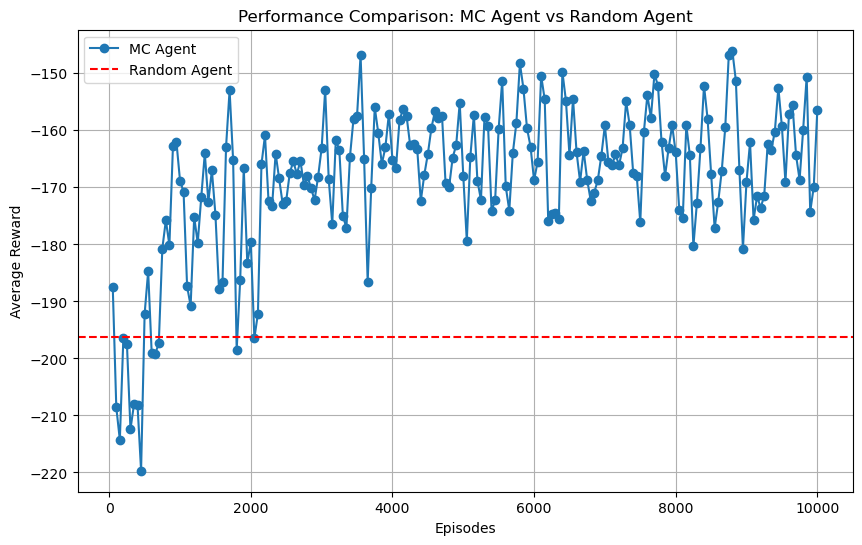

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(episode_numbers, moving_average_rewards, label='MC Agent', marker='o')
plt.axhline(y=random_avg_reward, color='r', linestyle='--', label='Random Agent')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Performance Comparison: MC Agent vs Random Agent')
plt.legend()
plt.grid(True)
plt.show()

## (e) (15 points) 
Implement Q-Learning to learn a policy for the task. Use the same parameters as
for Monte-Carlo as defaults.


In [25]:
env = gym.make("LunarLander-v2")

n_episodes = 10000
timesteps=1000
epsilon = 0.1
alpha = 0.1
gamma = 0.99
step_size = 50  
moving_average_window = 100  

Q = defaultdict(lambda: np.zeros(env.action_space.n))

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(env.action_space.n)
    else:
        return np.argmax(Q[state])

episode_numbers = []
moving_average_rewards = []

last_n_rewards = []  # To keep the rewards of the last MA episodes

for episode in range(1, n_episodes + 1):
    episode_rewards = 0
    state, _ = env.reset()
    state = discretize_state(state)
    
    done = False
    episode_states_actions = []
    episode_rewards = []
    
    for _ in range(timesteps):
        action = choose_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        # Update Q-table for Q(s,a)
        Q[state][action] = Q[state][action]  + alpha * (reward + gamma * np.argmax(Q[next_state]) - Q[state][action])

        episode_states_actions.append((state, action))
        episode_rewards.append(reward)
        
        state = next_state
        done = terminated or truncated

        if done:
            break

    total_episode_reward = sum(episode_rewards)
    last_n_rewards.append(total_episode_reward)
    
    if len(last_n_rewards) > moving_average_window:
        last_n_rewards.pop(0)
    
    moving_average = np.mean(last_n_rewards)
    
    if episode % step_size == 0:
        episode_numbers.append(episode)
        moving_average_rewards.append(moving_average)
        print(f"Episode {episode} completed. Moving Average Reward over last {moving_average_window} episodes: {moving_average}")

Episode 50 completed. Moving Average Reward over last 100 episodes: -214.35239156097677
Episode 100 completed. Moving Average Reward over last 100 episodes: -192.28249331524472
Episode 150 completed. Moving Average Reward over last 100 episodes: -177.55524893590592
Episode 200 completed. Moving Average Reward over last 100 episodes: -162.2643397488201
Episode 250 completed. Moving Average Reward over last 100 episodes: -130.2592739256253
Episode 300 completed. Moving Average Reward over last 100 episodes: -137.5053692290203
Episode 350 completed. Moving Average Reward over last 100 episodes: -156.54966470269474
Episode 400 completed. Moving Average Reward over last 100 episodes: -146.2871952709784
Episode 450 completed. Moving Average Reward over last 100 episodes: -117.2248862114919
Episode 500 completed. Moving Average Reward over last 100 episodes: -114.4336316795566
Episode 550 completed. Moving Average Reward over last 100 episodes: -117.2797275657249
Episode 600 completed. Moving

In [26]:
n_test_episodes = 100
total_rewards = 0.0

for episode in range(n_test_episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    done = False
    episode_reward = 0.0
    
    while not done:
        action = np.argmax(Q[state])  # action with the highest Q-value
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        episode_reward += reward
        state = next_state
        done = terminated or truncated
    
    total_rewards += episode_reward

average_reward = total_rewards / n_test_episodes
print(f"Average reward over {n_test_episodes} test episodes: {average_reward}")

Average reward over 100 test episodes: -92.99059346527241


## (f) (10 points) 
Again, train a policy and evaluate it. Plot a curve showing the progress of training,
i.e., the quality of the policy over the number of game steps (frames) trained on. Interpret the
learning curve. What can be said about the performance of the algorithm with these parameters
and this state representation on the given task? How does this compare to the performance of
Monte-Carlo?


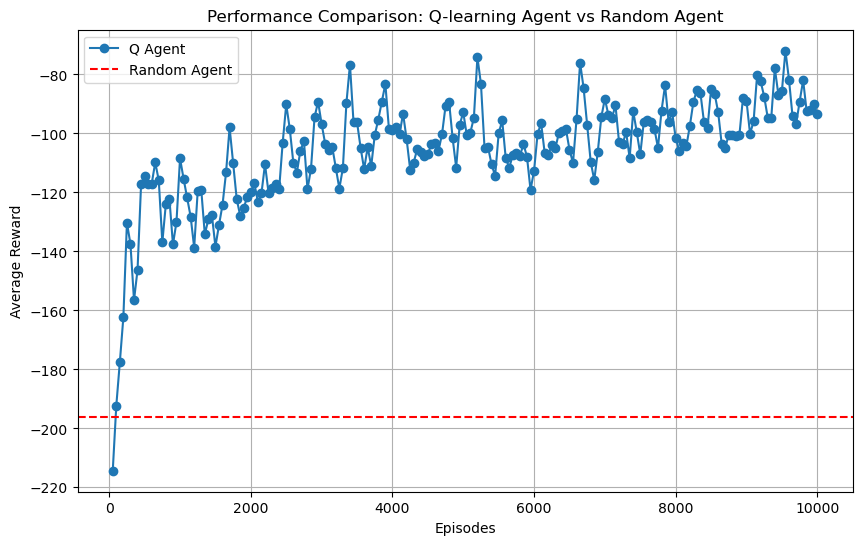

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(episode_numbers, moving_average_rewards, label='Q Agent', marker='o')
plt.axhline(y=random_avg_reward, color='r', linestyle='--', label='Random Agent')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Performance Comparison: Q-learning Agent vs Random Agent')
plt.legend()
plt.grid(True)
plt.show()

## (g) (20 points) 
Pick one of the algorithms and try to tune the parameters as well as the discretization in order to improve the performance. Interpret the results of the experiments. Do the
optimal parameter values depend on each other? 

Hint: The paper https://arxiv.org/abs/2011.11850 might give some useful information
about reasonable parameter values.

In [47]:

#Observation High
# [1.5 1.5 5. 5. 3.14 5. 1. 1. ]

# Observation Low
# [-1.5 -1.5 -5. -5. -3.14 -5. -0. -0. ]

def discretize_state(state, n=10):
    number_of_buckets = (n, n, n, n, n, n, 2, 2)  # buckets in each dimension
    state_value_bounds = list(zip(env.observation_space.low, env.observation_space.high))

    state_value_bounds[0] = [-1, 1]  # Position x
    state_value_bounds[1] = [-1, 1]  # Position y
    state_value_bounds[2] = [-1, 1]  # vel x
    state_value_bounds[3] = [-1, 1]  # vel y
    state_value_bounds[4] = [-1, 1]  # angle
    state_value_bounds[5] = [-1, 1]  # angular vel
    state_value_bounds[6] = [0, 1]   # leg1
    state_value_bounds[7] = [0, 1]   # leg2

    bucket_indexes = []
    for i in range(len(state)):
        if state[i] <= state_value_bounds[i][0]:
            bucket_index = 0
        elif state[i] >= state_value_bounds[i][1]:
            bucket_index = number_of_buckets[i] - 1
        else:
            bound_width = state_value_bounds[i][1] - state_value_bounds[i][0]
            offset = (number_of_buckets[i] - 1) * state_value_bounds[i][0] / bound_width
            scaling = (number_of_buckets[i] - 1) / bound_width
            bucket_index = int(round(scaling * state[i] - offset))
        bucket_indexes.append(bucket_index)
    return tuple(bucket_indexes)

# Test the updated function
# Reset the environment to get an initial state
initial_state, _ = env.reset()

# Discretize the initial state using the new function
discrete_initial_state = discretize_state(initial_state)

print(f"Initial state: {initial_state}")
print(f"Discrete initial state: {discrete_initial_state}")


Initial state: [-0.00619745  1.4195114  -0.6277557   0.3818279   0.00718815  0.14219607
  0.          0.        ]
Discrete initial state: (4, 9, 2, 6, 5, 5, 0, 0)


In [52]:
env = gym.make("LunarLander-v2")

n_episodes = 10000
timesteps=1000
epsilon = 0.1
alpha = 0.25
gamma = 0.99
step_size = 50  
moving_average_window = 100  

Q = defaultdict(lambda: np.zeros(env.action_space.n))

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(env.action_space.n)
    else:
        return np.argmax(Q[state])

episode_numbers = []
moving_average_rewards = []

last_n_rewards = []  # To keep the rewards of the last MA episodes

for episode in range(1, n_episodes + 1):
    episode_rewards = 0
    state, _ = env.reset()
    state = discretize_state(state)
    
    done = False
    episode_states_actions = []
    episode_rewards = []
    
    for _ in range(timesteps):
        action = choose_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        # Update Q-table for Q(s,a)
        Q[state][action] = Q[state][action]  + alpha * (reward + gamma * np.argmax(Q[next_state]) - Q[state][action])

        episode_states_actions.append((state, action))
        episode_rewards.append(reward)
        
        state = next_state
        done = terminated or truncated

        if done:
            break

    total_episode_reward = sum(episode_rewards)
    last_n_rewards.append(total_episode_reward)
    
    if len(last_n_rewards) > moving_average_window:
        last_n_rewards.pop(0)
    
    moving_average = np.mean(last_n_rewards)
    
    if episode % step_size == 0:
        episode_numbers.append(episode)
        moving_average_rewards.append(moving_average)
        print(f"Episode {episode} completed. Moving Average Reward over last {moving_average_window} episodes: {moving_average}")

Episode 50 completed. Moving Average Reward over last 100 episodes: -175.8120961153041
Episode 100 completed. Moving Average Reward over last 100 episodes: -176.2330549727646
Episode 150 completed. Moving Average Reward over last 100 episodes: -164.87806253963456
Episode 200 completed. Moving Average Reward over last 100 episodes: -135.17344140592317
Episode 250 completed. Moving Average Reward over last 100 episodes: -125.81103023085048
Episode 300 completed. Moving Average Reward over last 100 episodes: -138.4630843130068
Episode 350 completed. Moving Average Reward over last 100 episodes: -125.48935593732769
Episode 400 completed. Moving Average Reward over last 100 episodes: -126.42513718483934
Episode 450 completed. Moving Average Reward over last 100 episodes: -127.46813527179592
Episode 500 completed. Moving Average Reward over last 100 episodes: -119.60517800622034
Episode 550 completed. Moving Average Reward over last 100 episodes: -113.66306771200107
Episode 600 completed. Mo

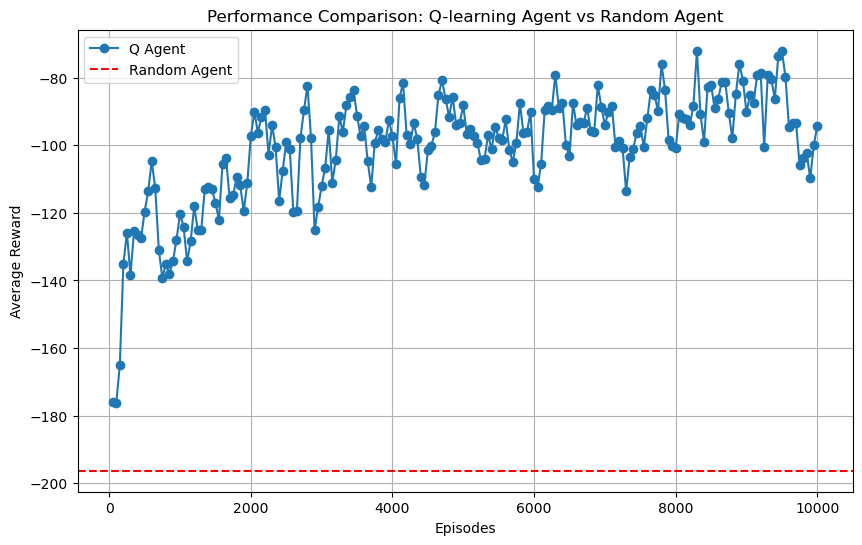

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(episode_numbers, moving_average_rewards, label='Q Agent', marker='o')
plt.axhline(y=random_avg_reward, color='r', linestyle='--', label='Random Agent')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Performance Comparison: Q-learning Agent vs Random Agent')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
n_test_episodes = 100
total_rewards = 0.0

for episode in range(n_test_episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    done = False
    episode_reward = 0.0
    
    while not done:
        action = np.argmax(Q[state])  # action with the highest Q-value
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        episode_reward += reward
        state = next_state
        done = terminated or truncated
    
    total_rewards += episode_reward

average_reward = total_rewards / n_test_episodes
print(f"Average reward over {n_test_episodes} test episodes: {average_reward}")

Average reward over 100 test episodes: -93.76232069664327


## (h) (10 points) 
Once you have learned a good policy, check whether it is robust enough to handle
small variations in the environment. One way to do this relatively easily is to enable wind
(enable_wind and wind_power parameters in textttgym.make) and measure the performance
of the policy with different amounts of wind.

SyntaxError: invalid syntax (468433087.py, line 3)

## (i) (50 bonus points) 
Implement Deep-Q-Learning, i.e., use a neural network as function to
predict Q values for the actions. Compare the performance to the previous best model. Also,
compare the run-time required for training. Note that training with Deep-Q-Learning might
take a lot longer than training the other methods.

Hint: The same paper as above might help getting a reasonable setup for the network and the
training parameters. It is possible to make the network somewhat smaller (e.g., 2 hidden layers
with 64 units each might do) to make training a bit less expensive.
